# Data Science Assignment 3.1
## 2. Multi Variate Linear Regression on Boston Housing Dataset from Kaggle

First, let us import the required modules and the data

In [135]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

# Import the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_data = pd.read_csv("housing.csv",header=None, delimiter=r"\s+", names = column_names)
print("Shape of the data (rows, columns): ", raw_data.shape)
print()
print(raw_data.head())

# Describing the data
print("Statistics of the data")
raw_data.describe()

Shape of the data (rows, columns):  (506, 14)

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]
Statistics of the data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Feature scaling
Scaling the dataset (standardization of data).
Here, we are using the Z-score Normalization technique to normalize all the columns

In [136]:
# Copying the original data into a new data frame
norm_data = raw_data.copy()

# Applying the z-score normalization on each column
for column in column_names:
  if column != column_names[-1]:
    norm_data[column] = (norm_data[column] - norm_data[column].mean()) / norm_data[column].std()

print(norm_data)


         CRIM        ZN     INDUS      CHAS  ...   PTRATIO         B     LSTAT  MEDV
0   -0.419367  0.284548 -1.286636 -0.272329  ... -1.457558  0.440616 -1.074499  24.0
1   -0.416927 -0.487240 -0.592794 -0.272329  ... -0.302794  0.440616 -0.491953  21.6
2   -0.416929 -0.487240 -0.592794 -0.272329  ... -0.302794  0.396035 -1.207532  34.7
3   -0.416338 -0.487240 -1.305586 -0.272329  ...  0.112920  0.415751 -1.360171  33.4
4   -0.412074 -0.487240 -1.305586 -0.272329  ...  0.112920  0.440616 -1.025487  36.2
..        ...       ...       ...       ...  ...       ...       ...       ...   ...
501 -0.412820 -0.487240  0.115624 -0.272329  ...  1.175303  0.386834 -0.417734  22.4
502 -0.414839 -0.487240  0.115624 -0.272329  ...  1.175303  0.440616 -0.500355  20.6
503 -0.413038 -0.487240  0.115624 -0.272329  ...  1.175303  0.440616 -0.982076  23.9
504 -0.407361 -0.487240  0.115624 -0.272329  ...  1.175303  0.402826 -0.864446  22.0
505 -0.414590 -0.487240  0.115624 -0.272329  ...  1.175303  0.440

### Splitting the normalized dataset into training and testing data

In [137]:
# Randomly sampling the normalized data (rows) into training and the test datasets.
# 80% - Training data; 20% - Testing data
train_data = norm_data.sample(frac = 0.8, random_state = 25)


# We form the test data by dropping the rows present in the training data from the normalized data frame
test_data = norm_data.drop(train_data.index)

# First split the dataframe and then convert the pandas dataframe into numpy array
shape_tup = train_data.shape
rows = shape_tup[0]
cols = shape_tup[1]
x_train_data = train_data.iloc[:, :cols-1]
y_train_data = train_data.iloc[:, cols-1:cols]
x_train = x_train_data.values
y_train = y_train_data.values

# Supressing the scientific notation while printing the numpy arrays
np.set_printoptions(suppress=True)

# Printing the x and y of traning data
print("X of the train data:")
print(x_train.shape)
print("Y of the train data:")
print(y_train.shape)

# Similarly, dividing the test data
shape_tup = test_data.shape
rows = shape_tup[0]
cols = shape_tup[1]
x_test_data = test_data.iloc[:, :cols-1]
y_test_data = test_data.iloc[:, cols-1:cols]
x_test = x_test_data.values
y_test = y_test_data.values

print("X of the test data:")
print(x_test.shape)
print("Y of the test data:")
print(y_test.shape)

X of the train data:
(405, 13)
Y of the train data:
(405, 1)
X of the test data:
(101, 13)
Y of the test data:
(101, 1)


### Applying the Gradient Descent on the data

In [138]:
# First we need to add a column of ones in the X of both training and test data
train_ones = np.ones(shape = y_train.shape, dtype = np.float64)

# Joining this array of ones with the x_train
x_train = np.concatenate((train_ones, x_train), axis = 1)

# Now doing the same with test data
test_ones = np.ones(shape = y_test.shape, dtype = np.float64)
x_test = np.concatenate((test_ones, x_test), axis = 1)


print("New training data shape: ", x_train.shape, "\nNew test data shape: ", x_test.shape)

New training data shape:  (405, 14) 
New test data shape:  (101, 14)


## Running Batch Gradient Descent on the data

First Initialise all the required vectors and parameters

In [139]:
# Initialising the Vector forms
X, Y = x_train, y_train
X_T = np.transpose(X)
print(X.shape, Y.shape, X_T.shape)

# Initialising the parameters; Number of rows in the theta array i.e. number of parameters in the hypothesis, 
# is equal to the number of columns in the x_train
theta = np.ones((x_train.shape[1], 1), dtype = np.float64)

# Learning rate
alpha = 0.05
epochs = 10000
noOfFeatures = theta.shape[0]

# Storing the cost at each epoch
cost_list = []

# Storing the shapes of the numpy arrays
m = X.shape[0]
n = X.shape[1]
# Starting the Batch Gradient Descent algorithm
# batch gradient descent model
for i in range(0, epochs):
  # updating the theta array
  temp = theta
  h = X @ temp
  h = np.subtract(h, Y)
  pd = (X_T @ h)/m
  temp = temp - alpha*(pd)
  theta = temp
  h = X @ theta - Y
  h_T = np.transpose(h)
  sqr = h_T @ h
  cost = (sqr)/(2*m)
  print( "At epoch ",i ," cost is: ", cost[0][0])
  cost_list.append(cost)



Streaming output truncated to the last 5000 lines.
At epoch  5000  cost is:  10.547696269896365
At epoch  5001  cost is:  10.547696269896367
At epoch  5002  cost is:  10.547696269896369
At epoch  5003  cost is:  10.547696269896365
At epoch  5004  cost is:  10.547696269896365
At epoch  5005  cost is:  10.547696269896365
At epoch  5006  cost is:  10.547696269896369
At epoch  5007  cost is:  10.547696269896367
At epoch  5008  cost is:  10.547696269896369
At epoch  5009  cost is:  10.547696269896369
At epoch  5010  cost is:  10.547696269896367
At epoch  5011  cost is:  10.547696269896367
At epoch  5012  cost is:  10.547696269896369
At epoch  5013  cost is:  10.547696269896367
At epoch  5014  cost is:  10.547696269896365
At epoch  5015  cost is:  10.547696269896367
At epoch  5016  cost is:  10.547696269896367
At epoch  5017  cost is:  10.547696269896365
At epoch  5018  cost is:  10.547696269896367
At epoch  5019  cost is:  10.547696269896369
At epoch  5020  cost is:  10.547696269896367
At e

#### We can see the Cost vs Epoch plot here

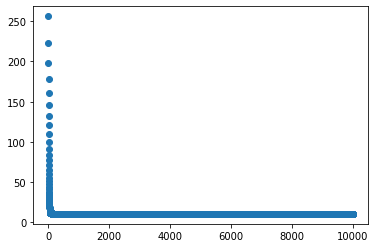

In [140]:
# Plotting the cost vs epoch 
epoch_range = list(range(0, epochs))

plt.scatter(epoch_range, cost_list)

- As we can see, the cost reduced drastically initially and then it saturated at a final value.
- Initially, the training was done for 10000 epochs.
- But it was understood that cost was saturating at some point. So the epochs are limited to 5000 for the final model.

## Predict test dataset using this model and calculate the accuracy of the model

In [141]:
# Predicting the test dataset using the trained model
# @ operator performs matrix multiplication between the numpy arrays on its either side
predicted = x_test @ theta
print("Predicted values for the test data: ")

# Getting the Root mean squared error
h = np.matmul(X,theta) - Y
h_T = np.transpose(h)
sqr = np.matmul(h_T, h)
rmse = math.sqrt((sqr)/m)
print("The Root mean squared error of the model: ", rmse)

Predicted values for the test data: 
The Root mean squared error of the model:  4.592972081320845


### Comparing the predicted vs actual values
Let us plot the predicted values against the original values with indices of rows on the X axis and corresponding values on Y axis

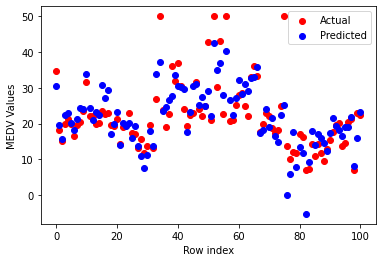

In [142]:
# Creating the scattered plot
indices = np.array(list(range(0, y_test.shape[0]))).reshape(y_test.shape[0], 1)

# Plotting the graphs
plt.scatter(indices, y_test, c = 'r', label = 'Actual')
plt.scatter(indices, predicted, c = 'b', label = 'Predicted')

# Labeling the axis
plt.xlabel('Row index')
plt.ylabel('MEDV Values')
  

# Creating the legend
plt.legend()
plt.show()

We can observe that most of the performance of our model on the test data.

